In [6]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

%matplotlib inline

In [25]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

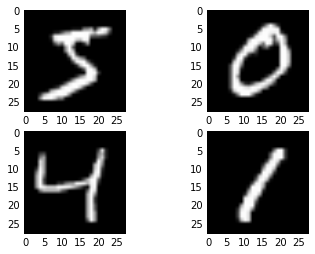

In [7]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

In [8]:
#fix random seed
seed = 7
numpy.random.seed(seed)

## Prepare dataset

In [26]:
#reduce the images to a vector of pixels
print(X_train.shape)
print(X_train[0])
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
print "num pixels per image : ", num_pixels
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')


(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [27]:
print(X_train[0])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    3.   18.   18.   18.
  126.  136.  175.   26.  166.  255.  247.  127.   

In [28]:
#normalize, gray scale is between 0 and 255
X_train = X_train / 255
X_test = X_test / 255

In [31]:
# one hot encode outputs (the output is an integer from 0 to 9, multiclass classification)
print y_train
y_train = np_utils.to_categorical(y_train)
print y_train
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print num_classes

[5 0 4 ..., 5 6 8]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
10


## Simple neural network

In [33]:
#define baseline model
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [34]:
#build the model
model = baseline_model()
#fit
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)
#Final evaluation of the model
scores = model.evaluate(X_test,y_test,verbose=0)
print("Baseline error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 0.2788 - acc: 0.9209 - val_loss: 0.1418 - val_acc: 0.9571
Epoch 2/10
5s - loss: 0.1118 - acc: 0.9677 - val_loss: 0.0922 - val_acc: 0.9700
Epoch 3/10
5s - loss: 0.0719 - acc: 0.9794 - val_loss: 0.0786 - val_acc: 0.9771
Epoch 4/10
6s - loss: 0.0503 - acc: 0.9858 - val_loss: 0.0746 - val_acc: 0.9768
Epoch 5/10
5s - loss: 0.0374 - acc: 0.9893 - val_loss: 0.0676 - val_acc: 0.9797
Epoch 6/10
5s - loss: 0.0269 - acc: 0.9928 - val_loss: 0.0631 - val_acc: 0.9812
Epoch 7/10
5s - loss: 0.0210 - acc: 0.9945 - val_loss: 0.0621 - val_acc: 0.9805
Epoch 8/10
6s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0626 - val_acc: 0.9806
Epoch 9/10
5s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0593 - val_acc: 0.9812
Epoch 10/10
5s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0580 - val_acc: 0.9815
Baseline error: 1.85%


## Simple convolutional neural network

In [35]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

In [36]:
K.set_image_dim_ordering('th')

In [37]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
# reshape to be [samples][channels][width][height]
#channels in case of images is the RGB, but on mnist is on gray scale is only 1
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( 'float32' )
print(X_train.shape)

(60000, 28, 28)
(60000, 1, 28, 28)


In [38]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## CNN structure

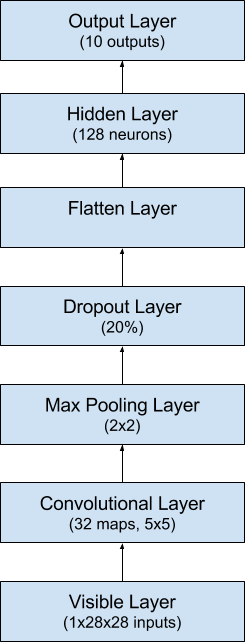

In [40]:
from IPython.display import Image
Image(filename='cnn.png') 

In [43]:
def simples_cnn():
    model = Sequential()
    #convolutional layer with 32 features maps, 5x5 receptive field (25 pixels at a time) 
    model.add(Conv2D(32,(5,5),input_shape=(1,28,28),activation='relu'))
    # pooling layers with 2x2
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    #flatten features map (full connected )
    model.add(Flatten())
    #hidden layer
    model.add(Dense(128,activation='relu'))
    #output
    model.add(Dense(num_classes,activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [45]:
# build the model
model = simples_cnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
54s - loss: 0.2519 - acc: 0.9275 - val_loss: 0.0791 - val_acc: 0.9759
Epoch 2/10
53s - loss: 0.0741 - acc: 0.9782 - val_loss: 0.0523 - val_acc: 0.9841
Epoch 3/10
57s - loss: 0.0510 - acc: 0.9847 - val_loss: 0.0439 - val_acc: 0.9852
Epoch 4/10
59s - loss: 0.0408 - acc: 0.9875 - val_loss: 0.0457 - val_acc: 0.9851
Epoch 5/10
63s - loss: 0.0346 - acc: 0.9896 - val_loss: 0.0381 - val_acc: 0.9874
Epoch 6/10
54s - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0332 - val_acc: 0.9887
Epoch 7/10
54s - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0345 - val_acc: 0.9874
Epoch 8/10
53s - loss: 0.0191 - acc: 0.9940 - val_loss: 0.0320 - val_acc: 0.9886
Epoch 9/10
53s - loss: 0.0161 - acc: 0.9947 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 10/10
53s - loss: 0.0147 - acc: 0.9950 - val_loss: 0.0351 - val_acc: 0.9879


In [46]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.21%


## Larger convolutional neutal network

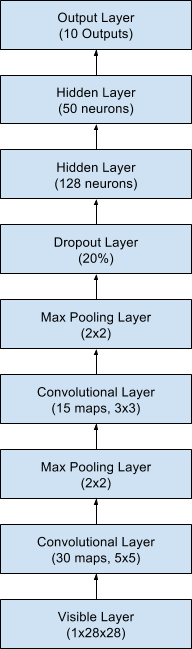

In [47]:
Image(filename='cnn_larger.png') 

In [48]:
def larger_model():
    # create model
    model = Sequential()
    #conv layer with 30 features maps, with 5x5 receptive field
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation= 'relu' ))
    # pooling layer 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # another coonv layer, now with 15 features maps, and 3x3 receptive field
    model.add(Conv2D(15, (3, 3), activation= 'relu' ))
    #another pooling layer 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #reduce ovverfitting with dropout 20%
    model.add(Dropout(0.2))
    #flaten layer 
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(50, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [49]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 57s - loss: 0.3768 - acc: 0.8827 - val_loss: 0.0870 - val_acc: 0.9723
Epoch 2/10
60000/60000 [==============================] - 56s - loss: 0.0971 - acc: 0.9697 - val_loss: 0.0534 - val_acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 56s - loss: 0.0698 - acc: 0.9780 - val_loss: 0.0433 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 56s - loss: 0.0567 - acc: 0.9820 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 55s - loss: 0.0489 - acc: 0.9844 - val_loss: 0.0307 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 55s - loss: 0.0424 - acc: 0.9864 - val_loss: 0.0323 - val_acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 55s - loss: 0.0379 - acc: 0.9881 - val_loss: 0.0288 - val_acc: 0.9902
Epoch 8/10
60000/60000 [==============================

In [50]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.82%


## Trying with more conv layers

In [57]:
def more_larger_model():
    # create model
    model = Sequential()
    #conv layer with 30 features maps, with 5x5 receptive field
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation= 'relu' ))
    # pooling layer 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # another coonv layer, now with 15 features maps, and 3x3 receptive field
    model.add(Conv2D(15, (3, 3), activation= 'relu' ))
    #another pooling layer 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
     # another coonv layer, now with 7 features maps, and 2x2 receptive field
    model.add(Conv2D(7, (2, 2), activation= 'relu' ))
    #another pooling layer 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #reduce ovverfitting with dropout 20%
    model.add(Dropout(0.2))
    #flaten layer 
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(50, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [59]:
# build the model
model = more_larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s - loss: 0.8574 - acc: 0.7198 - val_loss: 0.2269 - val_acc: 0.9331
Epoch 2/10
60000/60000 [==============================] - 57s - loss: 0.3824 - acc: 0.8778 - val_loss: 0.1615 - val_acc: 0.9526
Epoch 3/10
60000/60000 [==============================] - 59s - loss: 0.3070 - acc: 0.9026 - val_loss: 0.1334 - val_acc: 0.9623
Epoch 4/10
60000/60000 [==============================] - 57s - loss: 0.2409 - acc: 0.9230 - val_loss: 0.1066 - val_acc: 0.9674
Epoch 5/10
60000/60000 [==============================] - 57s - loss: 0.2121 - acc: 0.9338 - val_loss: 0.1007 - val_acc: 0.9679
Epoch 6/10
60000/60000 [==============================] - 57s - loss: 0.1951 - acc: 0.9382 - val_loss: 0.0825 - val_acc: 0.9753
Epoch 7/10
60000/60000 [==============================] - 57s - loss: 0.1816 - acc: 0.9420 - val_loss: 0.0859 - val_acc: 0.9741
Epoch 8/10
60000/60000 [==============================

In [61]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("More Large CNN Error: %.2f%%" % (100-scores[1]*100))

More Large CNN Error: 2.51%
